### Import Libraries

In [1]:
import pandas as pd
import matplotlib as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import os

### Load Clean DataSet

In [2]:
df=pd.read_csv('clean-healthcare-dataset-stroke-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4908 non-null   float64
 1   hypertension                    4908 non-null   int64  
 2   heart_disease                   4908 non-null   int64  
 3   avg_glucose_level               4908 non-null   float64
 4   bmi                             4908 non-null   float64
 5   Male                            4908 non-null   int64  
 6   ever_married                    4908 non-null   int64  
 7   Urban                           4908 non-null   int64  
 8   work_type_Govt_job              4908 non-null   int64  
 9   work_type_Never_worked          4908 non-null   int64  
 10  work_type_Private               4908 non-null   int64  
 11  work_type_Self-employed         4908 non-null   int64  
 12  work_type_children              49

In [3]:
df.max()

age                                82.00
hypertension                        1.00
heart_disease                       1.00
avg_glucose_level                 271.74
bmi                                97.60
Male                                1.00
ever_married                        1.00
Urban                               1.00
work_type_Govt_job                  1.00
work_type_Never_worked              1.00
work_type_Private                   1.00
work_type_Self-employed             1.00
work_type_children                  1.00
smoking_status_Unknown              1.00
smoking_status_formerly smoked      1.00
smoking_status_never smoked         1.00
smoking_status_smokes               1.00
stroke                              1.00
dtype: float64

## About the DataSet

### **EXTREMELY UNBALANCED**

### The "cleaned and encoded" dataset contains 4908 records
### Only 209 (4.25%) of these are positive for stroke and the rest (95.74%) are negative

### Will try to create models with different less unbalanced samples to run prediction models

### **Fortunately/Unfortunately there might not be enough positive cases to effectively predict**

### StandardScaler Scaled

In [4]:
ss=StandardScaler()
ss_scaled=ss.fit_transform(df)
ss_df=pd.DataFrame(ss_scaled, columns=df.columns)
ss_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,ever_married,Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1.069938,-0.318102,4.381499,2.777797,0.981145,1.200240,0.729270,0.985436,-0.383751,-0.067102,0.864071,-0.433030,-0.397953,-0.658022,2.206992,-0.778473,-0.420353,4.741651
1,1.646336,-0.318102,4.381499,0.014016,0.459086,1.200240,0.729270,-1.014779,-0.383751,-0.067102,0.864071,-0.433030,-0.397953,-0.658022,-0.453105,1.284565,-0.420353,4.741651
2,0.271847,-0.318102,-0.228232,1.484266,0.701016,-0.833166,0.729270,0.985436,-0.383751,-0.067102,0.864071,-0.433030,-0.397953,-0.658022,-0.453105,-0.778473,2.378956,4.741651
3,1.601998,3.143642,-0.228232,1.549325,-0.623231,-0.833166,0.729270,-1.014779,-0.383751,-0.067102,-1.157312,2.309308,-0.397953,-0.658022,-0.453105,1.284565,-0.420353,4.741651
4,1.690675,-0.318102,-0.228232,1.821493,0.013426,1.200240,0.729270,0.985436,-0.383751,-0.067102,0.864071,-0.433030,-0.397953,-0.658022,2.206992,-0.778473,-0.420353,4.741651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,-1.324334,-0.318102,-0.228232,-0.049918,-1.310821,-0.833166,-1.371234,-1.014779,-0.383751,-0.067102,-1.157312,-0.433030,2.512858,1.519706,-0.453105,-0.778473,-0.420353,-0.210897
4904,1.690675,-0.318102,-0.228232,0.448045,1.414072,-0.833166,0.729270,0.985436,-0.383751,-0.067102,-1.157312,2.309308,-0.397953,-0.658022,-0.453105,1.284565,-0.420353,-0.210897
4905,-0.348890,-0.318102,-0.228232,-0.502181,0.217156,-0.833166,0.729270,-1.014779,-0.383751,-0.067102,-1.157312,2.309308,-0.397953,-0.658022,-0.453105,1.284565,-0.420353,-0.210897
4906,0.360524,-0.318102,-0.228232,1.373057,-0.419501,1.200240,0.729270,-1.014779,-0.383751,-0.067102,0.864071,-0.433030,-0.397953,-0.658022,2.206992,-0.778473,-0.420353,-0.210897


In [5]:
ss_df.max()

age                                1.735013
hypertension                       3.143642
heart_disease                      4.381499
avg_glucose_level                  3.746933
bmi                                8.748363
Male                               1.200240
ever_married                       0.729270
Urban                              0.985436
work_type_Govt_job                 2.605854
work_type_Never_worked            14.902715
work_type_Private                  0.864071
work_type_Self-employed            2.309308
work_type_children                 2.512858
smoking_status_Unknown             1.519706
smoking_status_formerly smoked     2.206992
smoking_status_never smoked        1.284565
smoking_status_smokes              2.378956
stroke                             4.741651
dtype: float64

### Standard Scaler gave a value of 14.90 to an orginal value of 1 on the column work_type_Never_worked 
### This value almost doubles any other "scaled" value 

In [7]:
ss_df['work_type_Never_worked'].value_counts()

work_type_Never_worked
-0.067102     4886
 14.902715      22
Name: count, dtype: int64

In [8]:
ss_df['stroke'].value_counts()/len(ss_df)*100

stroke
-0.210897    95.741646
 4.741651     4.258354
Name: count, dtype: float64

In [36]:
# Define a function
def int_result(value):
    if value < 0:
        return 0
    return 1

# "Apply" the function to the amount column
ss_df['stroke'] = ss_df['stroke'].apply(int_result)

### 1 All Positive, and 3 All negative Samples

In [37]:
from codecs import ignore_errors #Do not remember adding this line, probably auto inserted by VSCode 

ss_Positives=ss_df.loc[ss_df['stroke']==ss_df['stroke'].max()]
ss_Negative_sample_1=ss_df.loc[ss_df['stroke']==ss_df['stroke'].min()] \
    .sample(len(ss_Positives),random_state=1, ignore_index=True)
ss_Negative_sample_2=ss_df.loc[ss_df['stroke']==ss_df['stroke'].min()] \
    .sample(len(ss_Positives),random_state=3, ignore_index=True)
ss_Negative_sample_3=ss_df.loc[ss_df['stroke']==ss_df['stroke'].min()] \
    .sample(len(ss_Positives),random_state=5, ignore_index=True)


### Balanced and proportionally unbalanced sets

In [77]:

DataSets={}
DataSets['One to One']= pd.concat([ss_Positives,ss_Negative_sample_1], axis=0)
DataSets['One to Two']= pd.concat([ss_Positives,ss_Negative_sample_1,ss_Negative_sample_2], axis=0)
DataSets['One to three']= pd.concat([ss_Positives,ss_Negative_sample_1,ss_Negative_sample_2,ss_Negative_sample_3], axis=0)
# DataSets
for key,value in DataSets.items():
    print(key)
#     DS.plot(figsize=(12,8))

One to One
One to Two
One to three


### Non of the positive results include someone that has "Never_worked"

<Axes: >

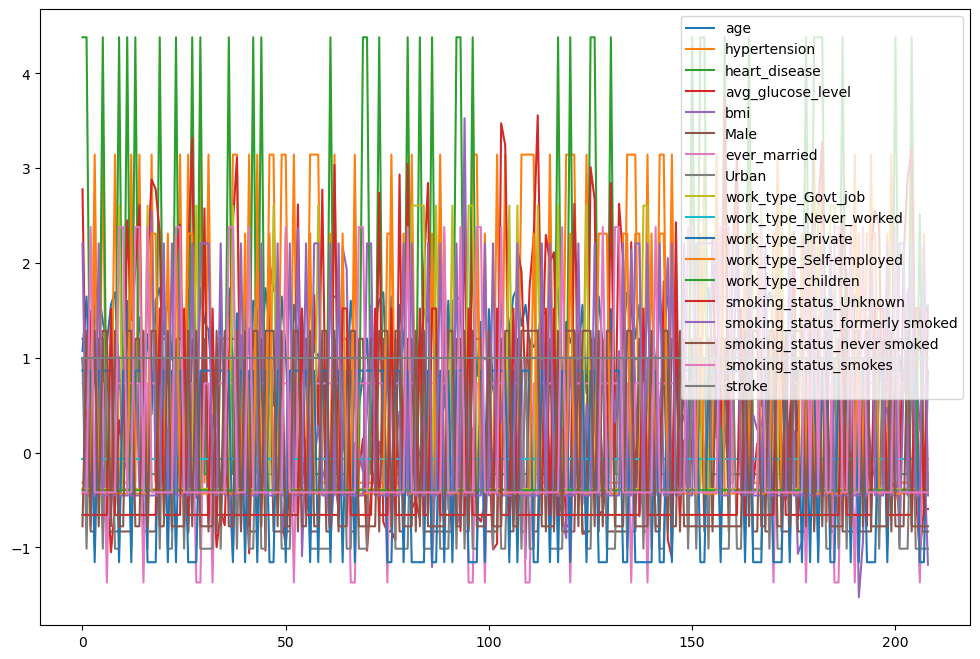

In [50]:
ss_Positives.plot(figsize=(12,8))

### train_test_split

In [78]:
# from sklearn.model_selection import train_test_split

for key,value in DataSets.items():
    X=value.copy().drop(columns='stroke')
    y=value['stroke']
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    print(key, lr.score(X_train,y_train))

One to One 0.7571884984025559
One to Two 0.7893617021276595
One to three 0.7974481658692185


In [44]:
y_train

13     1
187    1
61     1
77     0
196    0
      ..
46     0
72     1
187    0
26     0
37     1
Name: stroke, Length: 313, dtype: int64

In [47]:
from sklearn.linear_model import LogisticRegression


ss_predict=lr.predict(X_test)

0.7571884984025559


### MinMaxScaler

In [ ]:
mms=MinMaxScaler()
mms_scaled=mms.fit_transform(df)
mms_scaled_df=pd.DataFrame(mms_scaled, columns=df.columns)
mms_scaled_df
mms_scaled_df.plot.scatter(x='age', y='bmi')

### StandardScaler

In [ ]:
ss=StandardScaler()
ss_Scaled=ss.fit_transform(df_data)
ss_Scaled_df=pd.DataFrame(ss_Scaled, columns=df_data.columns)
ss_Scaled_df.plot.scatter(x='age',y='bmi')

### Get number of possible clusters

In [ ]:
inertia=[]
k_values=list(range(1,11))
for i in k_values:
    model=KMeans(n_clusters=i, n_init='auto',random_state=13)
    model.fit(ss_Scaled_df)
    inertia.append(model.inertia_)
inertia_df=pd.DataFrame({'k':k_values, 'inertia':inertia})
inertia_df.plot(x='k',y='inertia')

In [ ]:
inertia=[]
k_values=list(range(1,11))
for i in k_values:
    model=KMeans(n_clusters=i, n_init='auto',random_state=13)
    model.fit(mms_scaled_df)
    inertia.append(model.inertia_)
inertia_df=pd.DataFrame({'k':k_values, 'inertia':inertia})
inertia_df.plot(x='k',y='inertia')

In [ ]:
mms_model = KMeans(n_clusters=4, n_init='auto',random_state=13)
mms_model.fit(mms_scaled_df)
prediction = mms_model.predict(mms_scaled_df)
mms_scaled_df['prediction'] = prediction
mms_scaled_df.plot.scatter(x='age', y='bmi',c='prediction',colormap='winter')


In [ ]:
mms_scaled_df['prediction'].value_counts()/len(mms_scaled_df)